***About Dataset***

The "Daily Transactions" dataset contains information on dummy transactions made by
an individual on a daily basis. The dataset includes data on the products that were
purchased, the amount spent on each product, the date and time of each transaction,
the payment mode of each transaction, and the source of each record
(Expense/Income).
This dataset can be used to analyze purchasing behavior and money management,
forecasting expenses, and optimizing savings and budgeting strategies. The dataset is
well-suited for data analysis and machine learning applications,it can be used to train
predictive models and make data-driven decisions.

**Import Libraries and Load Data**

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [353]:
# Import Dataset as df veriable 
household = pd.read_csv("Desktop/Unified Data Analysis/Daily Transaction Analyst/Daily Household Transactions - Daily Household Transactions.csv")

**Display the first few rows of the dataset**

In [355]:
household.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [357]:
# Shape of the dataset
household.shape

(2461, 8)

**Handle missing values**

In [359]:
# Check for missing values
household.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [361]:
# Drop unnecessary values
household.dropna(subset=['Date','Mode','Amount'],inplace=True)

In [488]:
# Make veriable acording daily basis without null values
df_daily = household.dropna(axis = 0)

In [490]:
# Check data after droping null values
household.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19 00:00:00,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [367]:
# find null values
df_daily.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [322]:
# information data types
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1563 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1563 non-null   datetime64[ns]
 1   Mode            1563 non-null   object        
 2   Category        1563 non-null   category      
 3   Subcategory     1563 non-null   object        
 4   Note            1563 non-null   string        
 5   Amount          1563 non-null   float64       
 6   Income/Expense  1563 non-null   object        
 7   Currency        1563 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(4), string(1)
memory usage: 99.3+ KB


In [369]:
# Drop unnecessary space in data
household.columns = household.columns.str.strip()

***Correct Data types***

In [371]:
# Convert Date format as date time 
household["Date"]= pd.to_datetime(household["Date"], dayfirst = True, format = 'mixed')

In [373]:
# Change datatype as numeric in Amount columns
household["Amount"] = pd.to_numeric(household["Amount"])

In [375]:
# Change Datatypes to Category in category columns
household["Category"] = household["Category"].astype('category')

In [377]:
# Change datatypes to string 
household["Note"]= household["Note"].astype('string')

In [379]:
# After change datatypes check data set information
household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   category      
 3   Subcategory     1826 non-null   object        
 4   Note            1940 non-null   string        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(4), string(1)
memory usage: 139.6+ KB


In [381]:
# Drop duplicate values in real dataset
household.drop_duplicates(inplace = True)

In [383]:
# check all data types
household.dtypes

Date              datetime64[ns]
Mode                      object
Category                category
Subcategory               object
Note              string[python]
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

# Exploratory Data Analysis (EDA)

In [385]:
# Summary statistics
household.describe()

,Date,Amount
count,2452,2452.000000
mean,2017-04-03 18:15:34.260195840,2757.976664
min,2015-01-01 00:00:00,2.000000
25%,2016-10-17 03:45:40,35.000000
50%,2017-06-23 21:31:43,100.000000
75%,2018-01-16 08:37:16,784.500000
max,2018-09-20 12:04:08,250000.000000
std,NaN,12542.057491


**Distribution of Transection Amount**

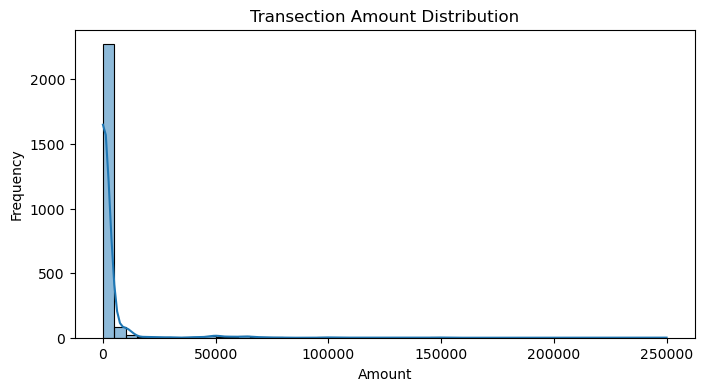

In [494]:
# Making histplot to show Distribution of Transection Amount
plt.figure(figsize = (8,4))
sns.histplot(household["Amount"], bins = 50, kde = True)
plt.title("Transection Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In this histplots showing Amount Transection Distribution Frequency.

In [389]:
household.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,2018-09-19 00:00:00,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


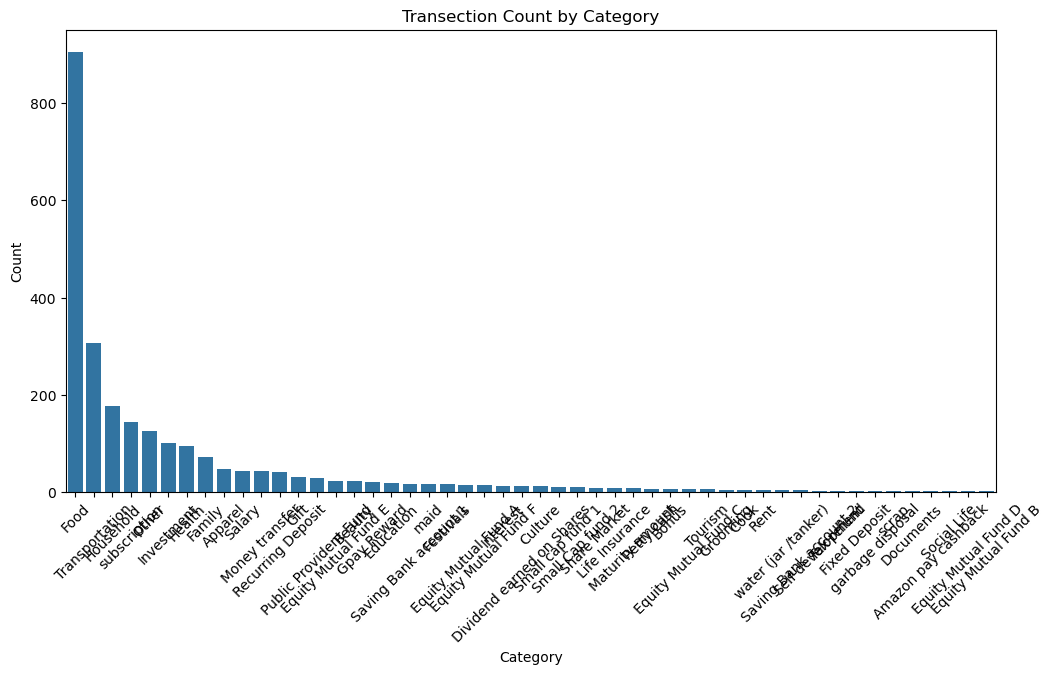

In [393]:
# Transetion Count by Category 
plt.figure(figsize = (12,6))
sns.countplot(data=household, x='Category', order=household['Category'].value_counts().index)
plt.title("Transection Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

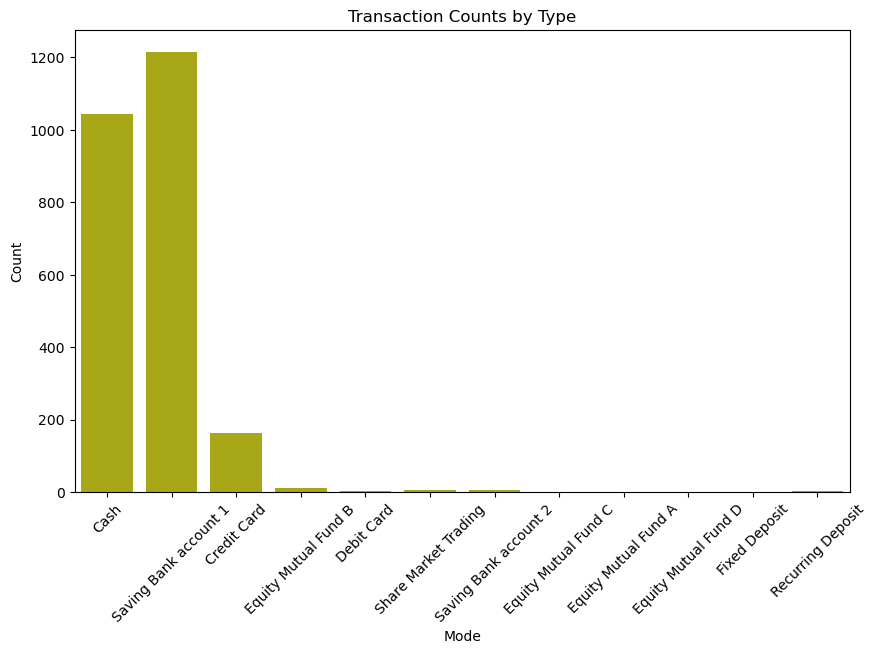

In [395]:
# Transaction counts by type
plt.figure(figsize=(10, 6))
sns.countplot(data=household, x='Mode', color = 'y')
plt.title('Transaction Counts by Type')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

There above countplot showing Mode of payment count

***Time Series Analysis***

**Trend analysis**

In [397]:
household.columns = household.columns.str.strip()

In [409]:
# Resample data to monthly frequency
monthly_data = household.resample('ME', on='Date')['Amount'].sum().reset_index(name='Amount')

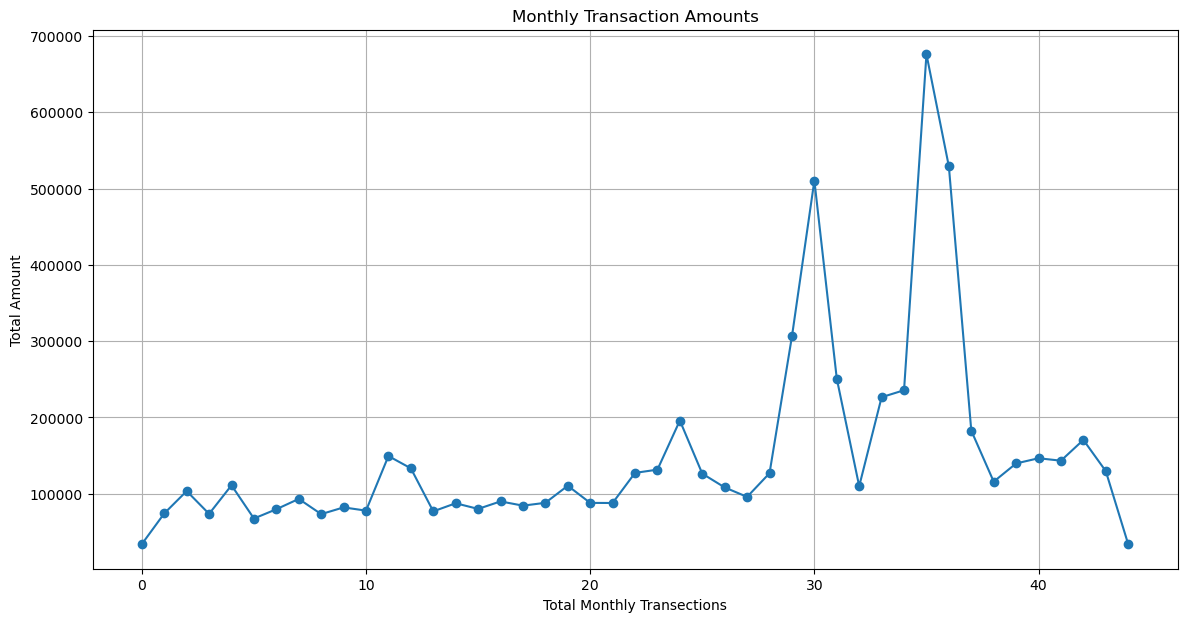

In [501]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Total Monthly Transections')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Above Graph Showing Monthly Transactions Amounts

In [108]:
df['Category']= df['Category'].astype('string')

In [436]:
daily_data = household.resample('ME', on='Date')['Amount'].sum().reset_index(name = "Amount")

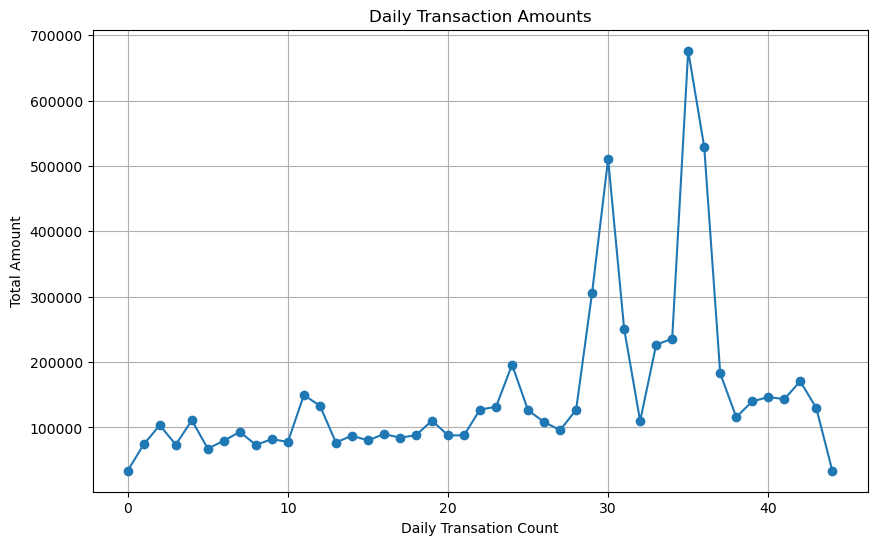

In [446]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Daily Transation Count')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Above Graph Showing Daily Transactions Amounts

**Correlation Anlaysis**

**Analyze the correlation between transaction categories and amounts.**

In [454]:
# Create a pivot table for correlation analysis
pivot_table = household.pivot_table(index = "Date", columns="Category", values= "Amount", observed=False,
                      aggfunc="sum",fill_value=0)

In [456]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

In [466]:
correlation_matrix.style.background_gradient(cmap='Blues')

Category,Amazon pay cashback,Apparel,Beauty,Bonus,Cook,Culture,Dividend earned on Shares,Documents,Education,Equity Mutual Fund A,Equity Mutual Fund B,Equity Mutual Fund C,Equity Mutual Fund D,Equity Mutual Fund E,Equity Mutual Fund F,Family,Festivals,Fixed Deposit,Food,Gift,Gpay Reward,Grooming,Health,Household,Interest,Investment,Life Insurance,Maturity amount,Money transfer,Other,Petty cash,Public Provident Fund,Recurring Deposit,Rent,Salary,Saving Bank account 1,Saving Bank account 2,Self-development,Share Market,Small Cap fund 2,Small cap fund 1,Social Life,Tax refund,Tourism,Transportation,garbage disposal,maid,scrap,subscription,water (jar /tanker)
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amazon pay cashback,1.000000,-0.002229,-0.001364,-0.000966,-0.001154,-0.002023,-0.001854,-0.000958,-0.001973,-0.000835,-0.000677,-0.001661,-0.000677,-0.000958,-0.000838,-0.003486,-0.001789,-0.000952,-0.009853,-0.002155,-0.002961,-0.001342,-0.001749,-0.002955,-0.001998,-0.003224,-0.001795,-0.001098,-0.003017,-0.002142,-0.001420,-0.003315,-0.004391,-0.001353,-0.004456,-0.001026,-0.001166,-0.000941,-0.001150,-0.002148,-0.002148,-0.000677,-0.000863,-0.000909,-0.001708,-0.000859,-0.002456,-0.000741,-0.002483,-0.000898
Apparel,-0.002229,1.000000,-0.004118,-0.002917,-0.003484,0.015818,-0.005595,-0.002892,0.002810,0.000017,-0.002044,-0.005015,-0.002044,-0.002656,-0.002529,0.004756,-0.005401,-0.002874,-0.014429,0.022524,-0.008938,-0.004052,0.100574,-0.008213,-0.006033,-0.009731,-0.005419,-0.003314,0.048920,-0.006225,-0.003347,0.042113,-0.004860,-0.004085,-0.013450,-0.003096,-0.003520,-0.002839,-0.003470,-0.006483,-0.006483,-0.002044,-0.002606,-0.002743,-0.000556,-0.002594,0.014095,-0.002238,-0.007290,-0.002711
Beauty,-0.001364,-0.004118,1.000000,-0.001785,-0.002132,-0.003737,-0.003424,-0.001770,-0.003644,-0.001542,-0.001251,-0.003069,-0.001251,-0.001770,-0.001548,-0.005888,-0.003305,-0.001759,-0.005755,-0.003981,-0.005470,-0.002480,-0.001787,-0.005459,-0.003692,-0.005616,-0.003316,-0.002028,-0.005573,-0.003928,-0.000409,-0.006124,-0.008112,-0.002500,-0.008231,-0.001895,-0.002154,-0.001737,-0.002123,-0.003967,-0.003967,-0.001251,-0.001595,-0.001678,-0.003093,-0.001587,-0.004537,-0.001369,-0.003460,-0.001659
Bonus,-0.000966,-0.002917,-0.001785,1.000000,-0.001510,-0.002647,-0.002426,-0.001254,-0.002581,-0.001092,-0.000886,-0.002174,-0.000886,-0.001254,-0.001097,-0.004562,-0.002342,-0.001246,0.012744,-0.002820,-0.003875,-0.001757,0.017025,-0.003867,-0.002615,-0.004219,-0.002349,-0.001437,-0.003948,0.003369,-0.001858,-0.004339,-0.005747,-0.001771,-0.005831,-0.001342,-0.001526,-0.001231,-0.001504,-0.002811,-0.002811,-0.000886,-0.001130,-0.001189,-0.002235,-0.001125,-0.003214,-0.000970,-0.003249,-0.001175
Cook,-0.001154,-0.003484,-0.002132,-0.001510,1.000000,-0.003162,-0.002897,-0.001497,-0.003083,-0.001305,-0.001058,-0.002597,-0.001058,-0.001497,-0.001310,-0.005448,-0.002796,-0.001488,0.106427,-0.003368,-0.004627,-0.002098,0.024713,-0.004619,-0.003123,-0.005038,-0.002805,-0.001716,-0.004715,-0.003347,-0.002219,0.204353,-0.006863,0.048349,-0.006963,-0.001603,-0.001822,-0.001470,-0.001796,-0.003356,-0.003356,-0.001058,-0.001349,-0.001420,-0.002669,0.072206,0.008793,-0.001159,-0.003880,0.219634
Culture,-0.002023,0.015818,-0.003737,-0.002647,-0.003162,1.000000,-0.005078,-0.002625,-0.005404,-0.002287,-0.001855,-0.004552,-0.001855,-0.002624,-0.002295,-0.005171,-0.004902,-0.002609,0.038150,-0.005904,-0.008111,-0.003677,-0.004792,-0.008096,-0.005475,-0.008831,-0.004918,-0.003008,0.015247,-0.005868,-0.003891,0.047696,-0.012030,-0.003708,-0.012206,-0.002810,-0.003194,-0.002577,-0.003149,-0.005884,-0.005884,-0.001855,-0.002365,-0.002489,0.005606,-0.002354,-0.006728,-0.002031,0.018228,-0.002460
Dividend earned on Shares,-0.001854,-0.005595,-0.003424,-0.002426,-0.002897,-0.005078,1.000000,-0.002405,-0.004951,-0.002095,-0.001700,-0.004170,-0.001700,-0.002405,-0.002103,0.064906,-0.004491,-0.002390,-0.022517,-0.005410,-0.007432,-0.003369,-0.004391,

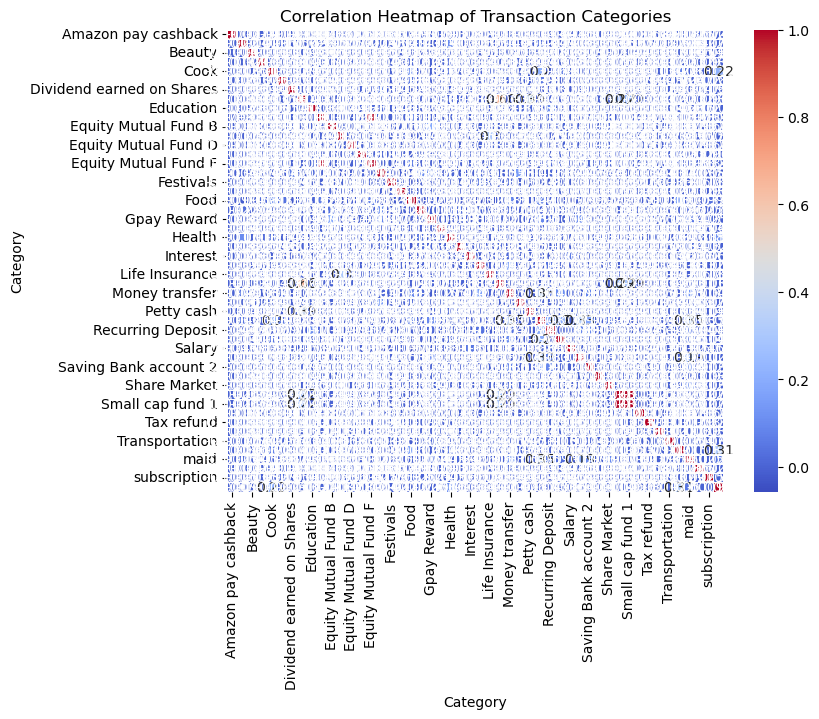

In [476]:
# Make a Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap of Transaction Categories")
plt.show()

Correlation Categorical vise in tihs heatmap

# Summary

The financial transactions dataset was analyzed to identify key trends and insights. The
data cleaning process involved handling missing values, correcting data types, and
removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of
transaction amounts, transaction counts by category and type, and significant patterns
over time. Time series analysis highlighted monthly and daily transaction trends.
Correlation analysis identified relationships between different transaction categories.

***Key Findings***

● The distribution of transaction amounts showed a right-skewed pattern with most
  transactions clustered around lower values.
  
● Sales and Purchases were the most common transaction categories.

● Credit transactions were more frequent than Debit transactions.

● Monthly transaction trends revealed seasonal patterns with peaks in certain
  months.
  
● Correlation analysis indicated strong relationships between certain transaction
  categories

**Visualizations**


● Distribution of Transaction Amounts.

● Transaction Counts by Category and Type.

● Monthly and Daily Transaction Amounts.

● Correlation Heatmap of Transaction Categories

This project provides valuable insights into daily financial transactions, helping to
inform decision-making and strategic planning.
Would you like more details on any specific part of the project or any additional
analysis?